In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression



# Ans 1

### Estimating the mean of  p(y|x)  is common because it represents the central tendency, minimizes the expected squared loss (mean squared error), is simple to compute and interpret, and aligns with linear models where the mean of the error term is zero, providing a straightforward prediction.

In [179]:
class Linear_Regression():
    def __init__(self,lr = 0.01,num_iter = 1000):
        self.lr = lr
        self.num_iter = num_iter
        self.weights  = None
        self.bias  = None
    def fit(self,X,y):
        num_samples,num_features = X.shape
        self.weights = np.zeroes(num_features)
        self.bias  = 0
        for i in range(self.num_iter):

            y_pred = np.dot(self.weights,X) + self.bias
            dw = (1/num_samples)*np.dot((y-y_pred) , X)
            db = (1/num_samples)*np.sum(y-y_pred)
            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db

    
    def predict(self,X):
        return np.dot(self.weights,X) + self.bias


### In basic linear regression, the standard deviation of errors shows how spread out data points are around the regression line. A smaller standard deviation means points are closer to the line, showing a better fit. Adjusting standard deviation helps handle cases where errors vary, making predictions more accurate and reliable.

# Ans2

In [180]:
train_A  = pd.read_csv('/Users/daiwikvohra/Downloads/train_set_A.csv')
train_B  = pd.read_csv('/Users/daiwikvohra/Downloads/train_set_B.csv')
train_C  = pd.read_csv('/Users/daiwikvohra/Downloads/train_set_C.csv')

test_A  = pd.read_csv('/Users/daiwikvohra/Downloads/test_set_A.csv')
test_B  = pd.read_csv('/Users/daiwikvohra/Downloads/test_set_B.csv')
test_C  = pd.read_csv('/Users/daiwikvohra/Downloads/test_set_C.csv')

In [181]:

train_a_x = train_A.x.to_numpy().reshape(-1,1)
train_a_y = train_A.y.to_numpy().reshape(-1,1)

train_b_x = train_B.x.to_numpy().reshape(-1,1)
train_b_y = train_B.y.to_numpy().reshape(-1,1)

train_c_x = train_C.x.to_numpy().reshape(-1,1)
train_c_y = train_C.y.to_numpy().reshape(-1,1)



In [182]:
test_a_x = test_A.x.to_numpy().reshape(-1, 1)
test_a_y = test_A.y.to_numpy().reshape(-1, 1)

test_b_x = test_B.x.to_numpy().reshape(-1, 1)
test_b_y = test_B.y.to_numpy().reshape(-1, 1)

test_c_x = test_C.x.to_numpy().reshape(-1, 1)
test_c_y = test_C.y.to_numpy().reshape(-1, 1)


In [205]:
model_A = LinearRegression().fit(train_a_x,train_a_y)
model_B= LinearRegression().fit(train_b_x,train_b_y)
model_C= LinearRegression().fit(train_c_x,train_c_y)




In [206]:
y_Aa = model_A.predict(test_a_x)
y_Ab = model_A.predict(test_b_x)
y_Ac = model_A.predict(test_c_x)

y_Ba = model_B.predict(test_a_x)
y_Bb = model_B.predict(test_b_x)
y_Bc = model_B.predict(test_c_x)

y_Ca = model_C.predict(test_a_x)
y_Cb = model_C.predict(test_b_x)
y_Cc = model_C.predict(test_c_x)

In [207]:
mseAa = (y_Aa-test_a_y)**2
mseAb = (y_Ab-test_b_y)**2
mseAc = (y_Ac-test_c_y)**2

print(mseAa.sum())
print(mseAb.sum())
print(mseAc.sum())


22257.707343715363
2561.655052277079
62.45723680320046


In [208]:
mseBa = (y_Ba-test_a_y)**2
mseBb = (y_Bb-test_b_y)**2
mseBc = (y_Bc-test_c_y)**2

print(mseBa.sum())
print(mseBb.sum())
print(mseBc.sum())

32732.193793787614
7.492987767125957e-21
2614.0814129664736


In [209]:
mseCa = (y_Ca-test_a_y)**2
mseCb = (y_Cb-test_b_y)**2
mseCc = (y_Cc-test_c_y)**2

print(mseCa.sum())
print(mseCb.sum())
print(mseCc.sum())

16156.746682236817
15774.197648433616
5699.794881411046


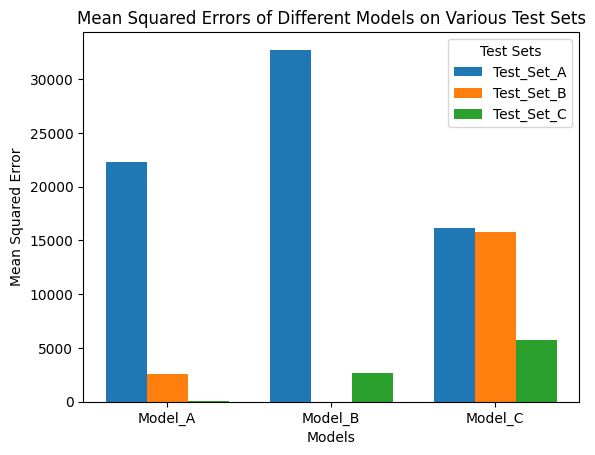

In [233]:


mse_model_a = [mseAa.sum(),mseAb.sum(),mseAc.sum()]  
mse_model_b = [mseBa.sum(),mseBb.sum(),mseBc.sum()]  
mse_model_c = [mseCa.sum(),mseCb.sum(),mseCc.sum()]   

mean_squared_errors = [mse_model_a, mse_model_b, mse_model_c]

mse_array = np.array(mean_squared_errors)

models = ['Model_A', 'Model_B', 'Model_C']
test_sets = ['Test_Set_A', 'Test_Set_B', 'Test_Set_C']




x = np.arange(3)

bar_width = 0.25

positions = [x + i * bar_width for i in range(3)]

fig, ax = plt.subplots()

for i in range(3):
    ax.bar(positions[i], mse_array[:, i], width=bar_width, label=test_sets[i])

ax.set_xlabel('Models')
ax.set_ylabel('Mean Squared Error')
ax.set_title('Mean Squared Errors of Different Models on Various Test Sets')
ax.set_xticks(x + bar_width)
ax.set_xticklabels(models)
ax.legend(title='Test Sets')

plt.show()


### From the graph, we can infer that the TestSet B and the Train Set B match with each other and are from the actual dataset which follows the following equation:(y = 3.8769*x)

# Ans 3

In [218]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [227]:
import numpy as np
import matplotlib.pyplot as plt

class Logistic_Classification_Batch():
    def __init__(self, lr=0.001, num_iter=1000):
        self.lr = lr
        self.num_iter = num_iter
        self.weights = None
        self.bias = None
        self.loss_history = []

    @staticmethod
    def sig(z):
        return 1 / (1 + np.exp(-z))
    
    def compute_loss(self, y, y_pred):
        num_samples = len(y)
        loss = -1 / num_samples * (np.dot(y, np.log(y_pred)) + np.dot(1 - y, np.log(1 - y_pred)))
        return loss

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0
        for i in range(self.num_iter):
            y_pred = self.sig(np.dot(X, self.weights) + self.bias)
            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / num_samples) * np.sum(y_pred - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
            # Compute and store the loss
            loss = self.compute_loss(y, y_pred)
            self.loss_history.append(loss)
            if i % 100 == 0:  # Print loss every 100 iterations
                print(f'Iteration {i}: Loss {loss}')
    
    def predict(self, X):
        y_pred = self.sig(np.dot(X, self.weights) + self.bias)
        return [1 if i > 0.5 else 0 for i in y_pred]
    
    def plot_loss(self):
        plt.plot(range(len(self.loss_history)), self.loss_history, label='Loss')
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.title('Loss Function Over Iterations')
        plt.legend()
        plt.show()


In [219]:
import numpy as np
import matplotlib.pyplot as plt

class Logistic_Classification_Fischer():
    def __init__(self, lr=0.001, num_iter=1000, alpha=0.01):
        self.lr = lr
        self.num_iter = num_iter
        self.alpha = alpha  # Regularization parameter
        self.weights = None
        self.bias = None
        self.loss_history = []

    @staticmethod
    def sig(z):
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, y, y_pred):
        num_samples = len(y)
        loss = -1 / num_samples * (np.dot(y, np.log(y_pred)) + np.dot(1 - y, np.log(1 - y_pred)))
        return loss

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0
        
        for i in range(self.num_iter):
            y_pred = self.sig(np.dot(X, self.weights) + self.bias)
            
            
            loss = self.compute_loss(y, y_pred)
            self.loss_history.append(loss)
            
            
            eta = np.dot(X, self.weights) + self.bias
            mu = self.sig(eta)
            derivative_eta = mu * (1 - mu)
            
           
            fisher_info = np.dot(X.T * derivative_eta, X)
            
            
            fisher_info += self.alpha * np.eye(num_features)
            
            
            score = np.dot(X.T, y - mu)
            
            
            self.weights += np.dot(np.linalg.inv(fisher_info), score)
            self.bias += np.sum(y - mu) / num_samples

    def predict(self, X):
        return [1 if i > 0.5 else 0 for i in self.sig(np.dot(X, self.weights) + self.bias)]

    def plot_loss(self):
        plt.plot(range(self.num_iter), self.loss_history, label='Loss')
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.title('Loss Function Over Iterations')
        plt.legend()
        plt.show()


In [231]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model1 = Logistic_Classification_Batch()
model1.fit(X_train,y_train)

model2 = Logistic_Classification_Fischer()
model2.fit(X_train,y_train)



y1 = model1.predict(X_test)
y2 = model2.predict(X_test)











Iteration 0: Loss 0.6931471805599461
Iteration 100: Loss nan
Iteration 200: Loss nan
Iteration 300: Loss nan
Iteration 400: Loss nan
Iteration 500: Loss nan
Iteration 600: Loss nan
Iteration 700: Loss nan
Iteration 800: Loss nan
Iteration 900: Loss nan


/var/folders/6v/f_975vxs321gq5chwxh9ccy40000gn/T/ipykernel_11576/3536173533.py:18: RuntimeWarning: divide by zero encountered in log
  loss = -1 / num_samples * (np.dot(y, np.log(y_pred)) + np.dot(1 - y, np.log(1 - y_pred)))
/var/folders/6v/f_975vxs321gq5chwxh9ccy40000gn/T/ipykernel_11576/3536173533.py:14: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/var/folders/6v/f_975vxs321gq5chwxh9ccy40000gn/T/ipykernel_11576/3217495399.py:19: RuntimeWarning: divide by zero encountered in log
  loss = -1 / num_samples * (np.dot(y, np.log(y_pred)) + np.dot(1 - y, np.log(1 - y_pred)))


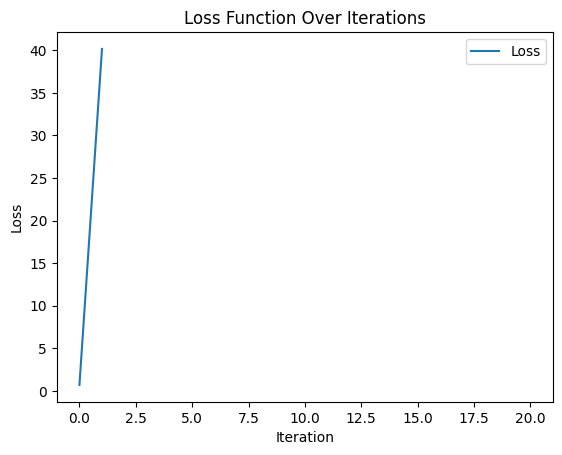

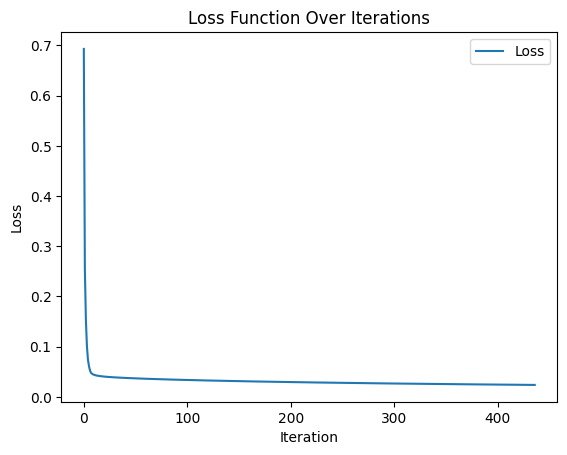

In [230]:
model1.plot_loss()
model2.plot_loss()

###  The graphs suggest that the loss function of the batch gradient descent model goes to 0 only after a few iterations whereas  the loss function for the fischer model reduces to about 0.5 after a few iterations but then hardly goes down further

# Ans 4a

### Generally, a flexible method would be expected to perform better than an inflexible method here. With a large sample size  n, flexible methods can capture complex relationships between predictors and response more accurately. They are less likely to suffer  from high bias because they can fit the data closely on the otherhand, inflexible method might struggle because it assumes a linear relationship and might underfit the data.

# Ans 4b

### An inflexible method (like simple linear regression) might perform better because it tends to have higher bias but lower variance. It relies on fewer parameters and assumptions, which can generalize better with a small dataset, whereas a flexible model is highly expected to overfit and have a high variance.

# Ans 4c

### A flexible method would be preffered because it  is expected to perform better in capturing the non-linear relationship between predictors and response. Methods like kernel methods, decision trees, or neural networks can better fit complex, non-linear patterns in the data, reducing bias. 

### Talking about the infelxible methods, it would likely perform worse because it assumes linear relationships or simpler structures that cannot capture non-linearities adequately. This leads to higher bias.

# Ans 5a

$$
p(y ; \eta)=b(y) \exp \left(\eta^{\top} T(y)-a(\eta)\right)
$$

Now, $\left.p(y ; \phi)=(1-\phi)^{y-1} \phi=\exp ((y-1) \log (1-\phi)+\log (\phi))\right)$
$$
=\exp \left(y \log (1-\phi)+\log \left(\frac{\phi}{1-\phi}\right)\right)
$$

Or comparing, $T(y)=y, \eta=\log (1-\phi), a(\eta)=\log \left(\frac{e^\eta}{1-e^\eta}\right), b(y)=1$

# Ans 5b


$\begin{aligned} & P(Y=y)=(1-\phi)^y \phi,   E(Y)=1 / \phi \\ & \Rightarrow P(Y=y)=\exp (y \log (1-\phi)+\log (\phi)) \\ & \text { Here, } \eta=\log (1-\phi) \& \mu=1 / \phi \\ & \Rightarrow \eta=\log \left(1-\frac{1}{\mu}\right) \Rightarrow g(\mu)=\log \left(1-\frac{1}{\mu}\right)\end{aligned}$

$
g(\mu) \text{is the canonical function}
$

# Ans 5c

Part $c$.
If we use the GLM modelling for geometric response, then the log likelihood can we written as :
$$
\begin{aligned}
& \eta=\theta^T x \\
& \ell_i(\theta)=\log \left[\exp \left(\theta^T x^{(i)} \cdot y^{(i)}-\log \left(\frac{e^{\theta^T x^{(i)}}}{1-e^{\theta^T x^{(i)}}}\right)\right)\right] \\
&= \theta^T x^{(i)} \cdot y^{(i)}+\log \left(e^{-\theta^T x^{(i)}}-1\right) \\
& \frac{\partial}{\partial \theta_j} \ell_i(\theta)=x_j^{(i)} y^{(i)}+\frac{e^{-\theta^T x^{(i)}}}{e^{-\theta^T x^{(i)}}-1}\left(-x_j^{(i)}\right) \\
&=\left(y^{(i)}-\frac{1}{1-e^{\theta^T x^{(i)}}}\right) x_j^{(i)} .
\end{aligned}
$$

So, Stochastic Gradient Ascent updation can be written as:
$$
\theta_{j+1}:=\theta j+\alpha\left(y^{(i)}-\frac{1}{1-e^{\theta^T x^{(i)}}}\right) x_j^{(i)}
$$

# Ans 6


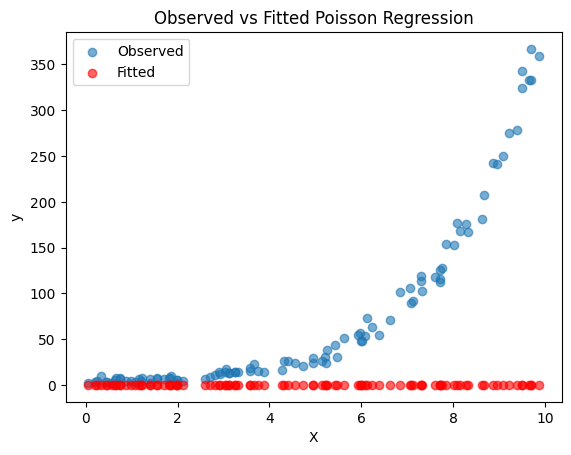

In [211]:


class Poisson_Regression:
    def __init__(self, lr=0.01, num_iter=1000):
        self.lr = lr
        self.num_iter = num_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for i in range(self.num_iter):
            linear_pred = np.dot(X, self.weights) + self.bias
            lambda_ = np.exp(linear_pred)  
            dw = (1 / num_samples) * np.dot(X.T, (lambda_ - y))
            db = (1 / num_samples) * np.sum(lambda_ - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        return np.exp(linear_pred)


np.random.seed(42)
n_samples = 100
X = np.random.uniform(0, 10, n_samples).reshape(-1, 1)  
beta_0 = 1.0
beta_1 = 0.5
lambda_ = np.exp(beta_0 + beta_1 * X.flatten())
y = np.random.poisson(lambda_)  


model = Poisson_Regression(lr=0.01, num_iter=10000)
model.fit(X, y)


y_pred = model.predict(X)


import matplotlib.pyplot as plt

plt.scatter(X, y, alpha=0.6, label='Observed')
plt.scatter(X, y_pred, alpha=0.6, label='Fitted', color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Observed vs Fitted Poisson Regression')
plt.show()
